In [1]:
import tensorflow as tf
import numpy as np
import math
import timeit
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
import os
from datetime import datetime

Using TensorFlow backend.


In [2]:
from data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=50000, num_test=10000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    # Subsample the data
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    y_train = keras.utils.to_categorical(y_train, 10)
    y_test = keras.utils.to_categorical(y_test, 10)


    return X_train, y_train, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (50000, 32, 32, 3)
Train labels shape:  (50000, 10)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 10)


layer1,xshape: (?, 32, 32, 16)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 16)   64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 32, 32, 16)   0           batch_normalization_1[0][0]      
______________________________________________________________________________

Epoch 1/200
781/781 [==============================] - 2491s 3s/step - loss: 2.4973 - acc: 0.2720 - val_loss: 2.1685 - val_acc: 0.3459
Epoch 2/200
781/781 [==============================] - 2450s 3s/step - loss: 2.0512 - acc: 0.3611 - val_loss: 1.7447 - val_acc: 0.4382
Epoch 3/200
781/781 [==============================] - 2146s 3s/step - loss: 1.6150 - acc: 0.4532 - val_loss: 1.4282 - val_acc: 0.5261
Epoch 4/200
781/781 [==============================] - 2739s 4s/step - loss: 1.4314 - acc: 0.5200 - val_loss: 1.2753 - val_acc: 0.5838
Epoch 5/200
781/781 [==============================] - 2142s 3s/step - loss: 1.2741 - acc: 0.5826 - val_loss: 1.2486 - val_acc: 0.5978
Epoch 6/200
781/781 [==============================] - 2136s 3s/step - loss: 1.1369 - acc: 0.6336 - val_loss: 1.0858 - val_acc: 0.6459
Epoch 7/200
781/781 [==============================] - 2136s 3s/step - loss: 1.0271 - acc: 0.6729 - val_loss: 1.1546 - val_acc: 0.6527
Epoch 8/200
781/781 [==============================] - 

781/781 [==============================] - 2118s 3s/step - loss: 0.3274 - acc: 0.9404 - val_loss: 0.5732 - val_acc: 0.8779
Epoch 62/200
781/781 [==============================] - 2105s 3s/step - loss: 0.3187 - acc: 0.9434 - val_loss: 0.5577 - val_acc: 0.8790
Epoch 63/200
781/781 [==============================] - 2104s 3s/step - loss: 0.3176 - acc: 0.9430 - val_loss: 0.5470 - val_acc: 0.8824
Epoch 64/200
781/781 [==============================] - 2103s 3s/step - loss: 0.3114 - acc: 0.9441 - val_loss: 0.5700 - val_acc: 0.8775
Epoch 65/200
781/781 [==============================] - 2126s 3s/step - loss: 0.3096 - acc: 0.9457 - val_loss: 0.5517 - val_acc: 0.8813
Epoch 66/200
781/781 [==============================] - 2863s 4s/step - loss: 0.3030 - acc: 0.9468 - val_loss: 0.5669 - val_acc: 0.8808
Epoch 67/200
781/781 [==============================] - 2134s 3s/step - loss: 0.3018 - acc: 0.9473 - val_loss: 0.5568 - val_acc: 0.8803
Epoch 68/200
781/781 [==============================] - 2244s

781/781 [==============================] - 2093s 3s/step - loss: 0.1936 - acc: 0.9751 - val_loss: 0.5890 - val_acc: 0.8875
Epoch 122/200
781/781 [==============================] - 2094s 3s/step - loss: 0.1931 - acc: 0.9759 - val_loss: 0.5830 - val_acc: 0.8885
Epoch 123/200
781/781 [==============================] - 2095s 3s/step - loss: 0.1939 - acc: 0.9755 - val_loss: 0.5873 - val_acc: 0.8888
Epoch 124/200
781/781 [==============================] - 2100s 3s/step - loss: 0.1894 - acc: 0.9767 - val_loss: 0.5858 - val_acc: 0.8889
Epoch 125/200
781/781 [==============================] - 2100s 3s/step - loss: 0.1913 - acc: 0.9763 - val_loss: 0.5899 - val_acc: 0.8892
Epoch 126/200
781/781 [==============================] - 2107s 3s/step - loss: 0.1907 - acc: 0.9766 - val_loss: 0.5873 - val_acc: 0.8886
Epoch 127/200
781/781 [==============================] - 2110s 3s/step - loss: 0.1904 - acc: 0.9760 - val_loss: 0.5912 - val_acc: 0.8891
Epoch 128/200
781/781 [==============================] 

Epoch 181/200
781/781 [==============================] - 2081s 3s/step - loss: 0.1751 - acc: 0.9803 - val_loss: 0.6176 - val_acc: 0.8891
Epoch 182/200
781/781 [==============================] - 2324s 3s/step - loss: 0.1770 - acc: 0.9793 - val_loss: 0.6192 - val_acc: 0.8901
Epoch 183/200
781/781 [==============================] - 2082s 3s/step - loss: 0.1759 - acc: 0.9800 - val_loss: 0.6157 - val_acc: 0.8902
Epoch 184/200
781/781 [==============================] - 2207s 3s/step - loss: 0.1761 - acc: 0.9803 - val_loss: 0.6130 - val_acc: 0.8898
Epoch 185/200
781/781 [==============================] - 2089s 3s/step - loss: 0.1755 - acc: 0.9800 - val_loss: 0.6145 - val_acc: 0.8892
Epoch 186/200
781/781 [==============================] - 2091s 3s/step - loss: 0.1742 - acc: 0.9808 - val_loss: 0.6133 - val_acc: 0.8903
Epoch 187/200
781/781 [==============================] - 2096s 3s/step - loss: 0.1741 - acc: 0.9811 - val_loss: 0.6168 - val_acc: 0.8888
Epoch 188/200
781/781 [==================

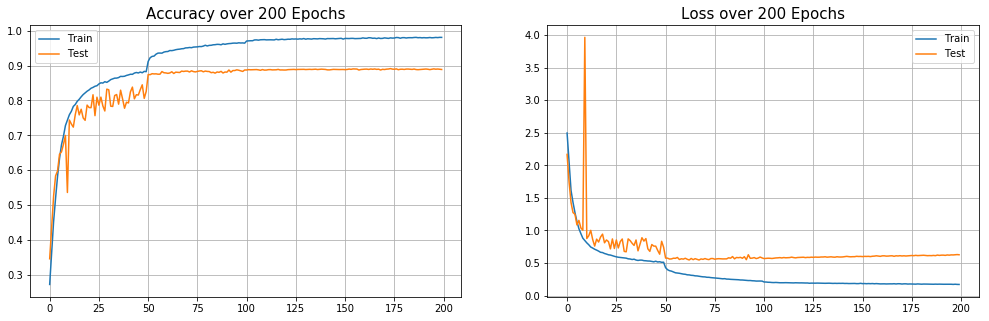

In [3]:
from keras_ResNet18 import *

h = train(64,200, X_train,y_train,X_test,y_test)
accuracy_curve(h)